Dataset Cars

https://archive.ics.uci.edu/ml/datasets/auto+mpg


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = sns.load_dataset("mpg").dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* mpg: miles per gallon
* cylinders
* displacement: volume of all the pistons (in cc)
* horsepower
* weight
* acceleration: zero to sixty miles per hour (in seconds)

In [2]:
df.describe().applymap(lambda x: round(x))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


## Horsepower and Weight?

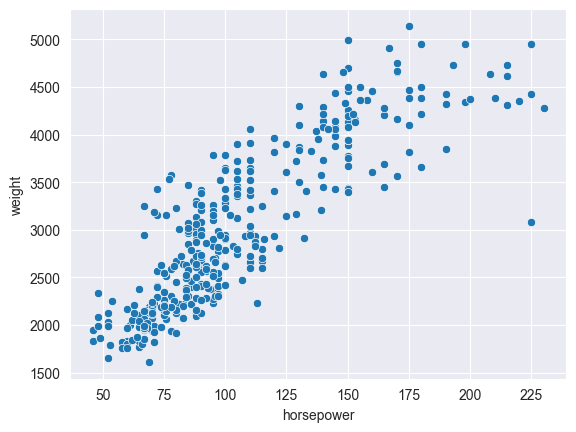

In [3]:
sns.scatterplot(x='horsepower', y='weight', data=df);

Si estoy buscando cómo explica Horsepower Weight, estoy describiendo a Horsepower cómo la variable dependiente. Por lo tanto voy a tener que encontrar una recta que mínimice la distancia a todos los puntos. SI Y = b0 + b1 * Horsepower, entonces buscaré la mínima distancia entre el valor de Y y el valor real de Weigths

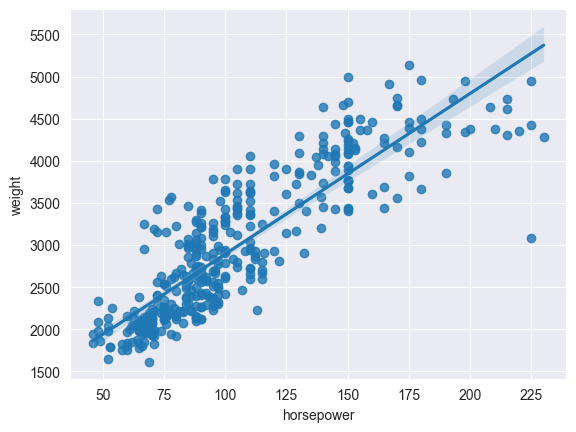

In [4]:
sns.regplot(x='horsepower', y='weight', data=df);


Interpretación

* ¿Horsepower causa más peso? ¿O autos más podersoso son más pesados?
* Cuanto explica del peso? Correlación o R2


In [5]:
round(df.corr(),2)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


In [7]:
print('R-cuadrado = ', (df.corr()['weight']['horsepower'])**2)

R-cuadrado =  0.7474254996898221


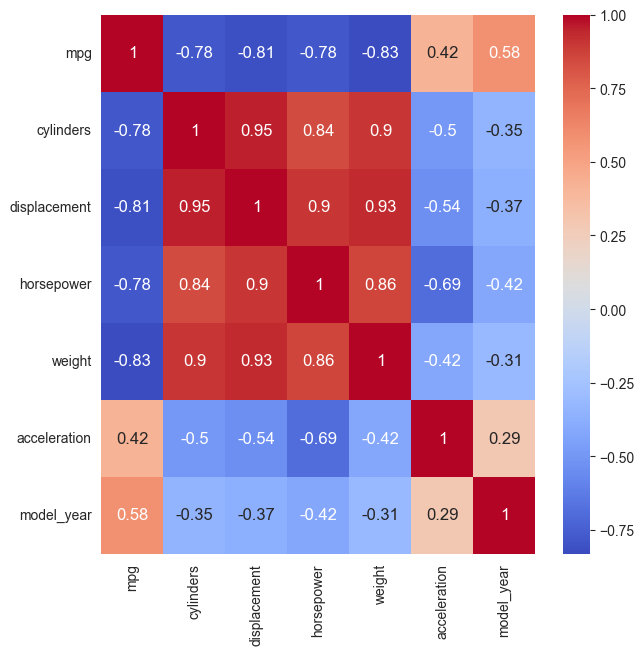

In [8]:
plt.figure(figsize = (7,7))
sns.heatmap(round(df.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

# Muestra vs Poblacion

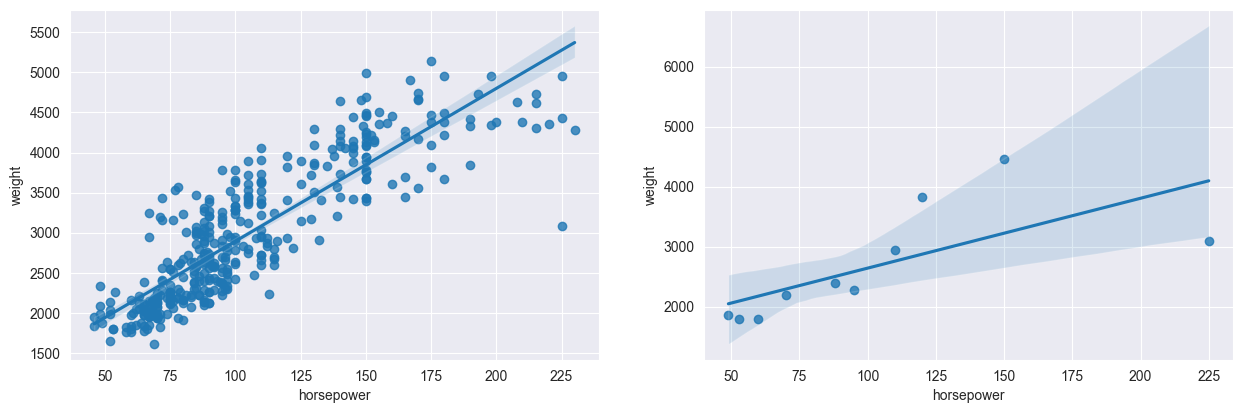

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='horsepower', y='weight', data=df, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='horsepower', y='weight', data=df.sample(10, random_state=6), ci=95);

## Statsmodels

## Opcion1: Version Clásica

In [10]:
import statsmodels.api as sm
Y = df['weight']
X = df['horsepower']
model = sm.OLS(Y, X).fit() # busca el mejor Beta
model.predict(X) #  Y_pred (la linea que pasa por la min distancia a los puntos)

0      3559.155868
1      4517.390141
2      4106.718310
3      4106.718310
4      3832.937089
          ...     
393    2354.518497
394    1423.662347
395    2299.762253
396    2162.871643
397    2245.006009
Length: 392, dtype: float64

## Opcion2: Formula API

In [11]:
# Instanciate a model
import statsmodels.formula.api as smf

model = smf.ols(formula='weight ~ horsepower', data=df)

# Train the model to find best line
model = model.fit()
model

## Interpretacion

In [12]:
print(model.params)

Intercept     984.500327
horsepower     19.078162
dtype: float64


In [13]:
model.rsquared


0.7474254996898198

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.36e-118
Time:                        18:52:43   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    984.5003     62.514     15.748      0.000     861.593    1107.408
horsepower    19.0782      0.562     33.972      0.000      17.974      20.182
==============================================================================
Omnibus:                       11.785   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               21.895
Skew:                           0.109   Prob(JB):                     1.76e-05
Kurtosis:                       4.137   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Chequeo la formula
n=390
residuals = model.predict(df['horsepower']) - df['weight']
residuals.std()/df.horsepower.std() * 1/(n**0.5)

0.5615843732511717

In [16]:
predicted_weights = model.predict(df['horsepower'])
predicted_weights


0      3464.661329
1      4132.396983
2      3846.224560
3      3846.224560
4      3655.442944
          ...     
393    2625.222220
394    1976.564728
395    2587.065897
396    2491.675089
397    2548.909574
Length: 392, dtype: float64

In [17]:
residuals = predicted_weights - df['weight']
residuals

0      -39.338671
1      439.396983
2      410.224560
3      413.224560
4      206.442944
          ...    
393   -164.777780
394   -153.435272
395    292.065897
396   -133.324911
397   -171.090426
Length: 392, dtype: float64

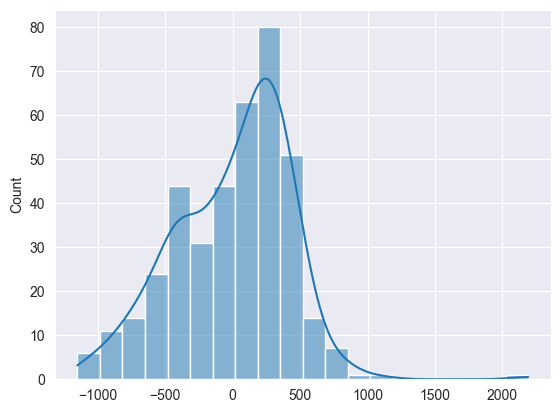

In [18]:
# visual check
sns.histplot(residuals, kde=True, edgecolor='w');

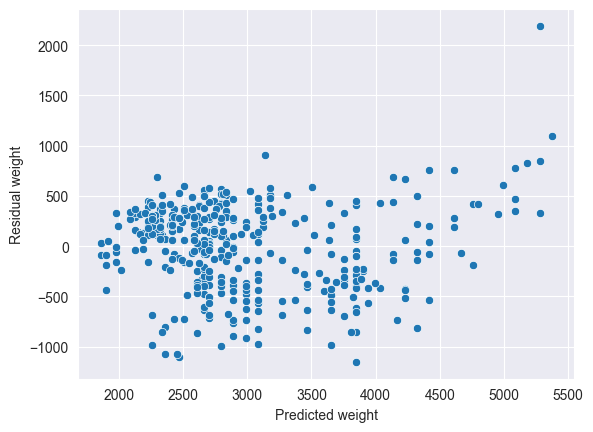

In [19]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=predicted_weights, y=residuals)
plt.xlabel('Predicted weight')
plt.ylabel('Residual weight');

# Regresion Multivariada

In [21]:
# run OLS model
model2 = smf.ols(formula='weight ~ horsepower + cylinders', data=df).fit()
model2.rsquared

0.8458154043882244

In [22]:
model2.params


Intercept     528.876711
horsepower      8.231070
cylinders     290.356425
dtype: float64

In [23]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [25]:
model3 = smf.ols(formula='weight ~ C(origin)', data=df).fit()
model3.params

Intercept             2433.470588
C(origin)[T.japan]    -212.242740
C(origin)[T.usa]       939.019208
dtype: float64

In [27]:
df.groupby('origin').agg({'weight':'mean'})


,weight
origin,
europe,2433.470588
japan,2221.227848
usa,3372.489796


In [29]:
# Drop the intercept if you want to
model3 = smf.ols(formula='weight ~ C(origin) -1', data=df).fit()
model3.params

C(origin)[europe]    2433.470588
C(origin)[japan]     2221.227848
C(origin)[usa]       3372.489796
dtype: float64